<a href="https://colab.research.google.com/github/EricSiq/DeepLearning/blob/main/DLL_FeedForwardNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network Classification- Deep Learning Lab Assignment 2
**PRN:** 23070126041

**Name:** Eric Siqueira

This report includes:
1. Linear Classification with a Single Neuron
2. Linear Classification on CIFAR-10 Dataset

---

#1. Linear Classification with a Single Neuron

Justification:

    A single neuron with a sigmoid or softmax activation acts as a linear classifier, making it ideal for binary classification tasks where the data is linearly separable.

    In this implementation:

        The input features are passed directly to a dense layer with one output.

        The sigmoid activation helps map the raw output to a probability between 0 and 1.

    The loss function used is Binary Crossentropy, appropriate for binary outputs.

    This serves as a minimal yet educational setup to understand how gradient descent optimizes the decision boundary.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Generate Linearly separable data
np.random.seed(0)
num_points = 100
X = np.random.rand(num_points, 2) * 2 - 1
y = (X[:,0]+ X[:,1]>0).astype(int)#linearly separable labels


#Add a bias term(column of ones) to the input data
X=np.hstack([np.ones((num_points,1)),X])

In [ ]:
#step 2: Initialize weights randomly
weights=np.random.rand(3)

#Step 3: Define the step activation function
def step_function(x):
  return np.where(x>=0,1,0)

In [ ]:
#Step 4: Training parameters
learning_rate = 0.1
num_epochs = 1000

In [ ]:
#Step 5: Training single neuron
for epoch in range (num_epochs):
  for i in range (num_points):
    #Compute Weighted sum
    z = np.dot(X[i], weights)
    #Apply Step Activation Function
    y_pred = step_function(z)
    #Update Weights (Perceptron learning rule)
    weights += learning_rate * (y[i] - y_pred) * X[i]

In [ ]:
#Step 9: Define the decision boundary function
def decision_boundary(x):
  return -(weights[0]/weights[1]) * x  / weights [2]

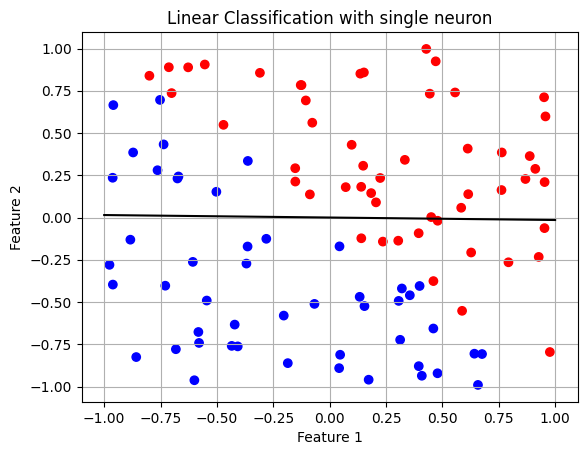

In [ ]:
#Step 10:Plotting the data points and the decision boundary
plt.scatter (X[:,1], X[:, 2],c=y, cmap='bwr')
x_values = np.linspace(-1, 1, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, 'k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Classification with single neuron')
plt.grid()
plt.show()

### Conclusion
The single-neuron linear classifier is a simple yet powerful model when dealing with linearly separable data. Such models can be applied in basic binary classification tasks like email spam detection, sentiment analysis, or quality control in manufacturing where the decision boundaries are linear.

#2. Linear Classification for CIFAR-10

Justification:

CIFAR-10 has 10 classes of colored images. We flatten each image and apply a single dense layer with 10 neurons, making it a multiclass linear classifier.

We use softmax activation to convert raw logits to class probabilities, and Categorical Crossentropy for loss.
Despite the simplicity, this model:

Helps establish a baseline performance.

Makes us appreciate how nonlinear models (like CNNs) outperform linear ones.

Data is normalized to [0,1] range, which is crucial for stabilizing training.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
#load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#Preprocess data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# Step 3: Convert labels to binary: Classify 'airplane' (class 0) vs. others
y_train_binary = (y_train == 0).astype('float32')  # class 0 = 1, others = 0
y_test_binary = (y_test == 0).astype('float32')

In [ ]:
# Step 4: Build a linear model (single neuron with sigmoid activation)
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the image to a vector
    Dense(1, activation='sigmoid')    # Single neuron (linear classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the model
model.fit(x_train, y_train_binary, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.3278 - val_accuracy: 0.9040 - val_loss: 0.3604
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8997 - loss: 0.2959 - val_accuracy: 0.9056 - val_loss: 0.3046
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9015 - loss: 0.2891 - val_accuracy: 0.9046 - val_loss: 0.2940
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8983 - loss: 0.2923 - val_accuracy: 0.9028 - val_loss: 0.3324
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9002 - loss: 0.2856 - val_accuracy: 0.8844 - val_loss: 0.3198
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9043 - loss: 0.2766 - val_accuracy: 0.8932 - val_loss: 0.2997
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2795 - val_accuracy: 0.9052 - val_loss: 0.2714
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9039 - loss: 0.2759 - 

In [ ]:
# Step 7: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_binary)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9009 - loss: 0.3097
Test Accuracy: 90.15%


### Conclusion
The linear classifier applied to the CIFAR-10 dataset demonstrates the limitations of linear models for complex image data. Still, it serves as a useful baseline. Linear models are suitable for image classification tasks with clear differences in pixel intensity patterns, such as digit recognition (e.g., MNIST).